In [ ]:
!pip install yfinance --upgrade --no-cache-dir

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
msft=yf.Ticker('A')

In [ ]:
msft.history(period='MAX')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-11-18,27.561002,30.286819,24.229453,26.652399,62546380,0.0,0.0
1999-11-19,26.008801,26.046661,24.115877,24.456604,15234146,0.0,0.0
1999-11-22,25.024482,26.652399,24.267311,26.652399,6577870,0.0,0.0
1999-11-23,25.743793,26.425247,24.229452,24.229452,5975611,0.0,0.0
1999-11-24,24.305171,25.403068,24.229453,24.873049,4843231,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-24,138.339996,139.889999,136.210007,137.490005,1553200,0.0,0.0
2024-04-25,137.059998,137.210007,134.119995,136.369995,940800,0.0,0.0
2024-04-26,136.449997,138.360001,135.000000,137.740005,754900,0.0,0.0


## Load and prepare the data.
Load your dataset containing stock symbols and dates from a CSV file into a pandas DataFrame.
Convert the 'date' column to datetime objects to facilitate date manipulation.


In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv('/content/drive/MyDrive/DataSets/raw_analyst_ratings.csv')

In [ ]:
data['date'] = pd.to_datetime(data['date'], errors='coerce').dt.date

In [ ]:
data.tail(10)

,Unnamed: 0,headline,url,publisher,date,stock
1407318,1413839,"Earnings Scheduled For August 22, 2012",https://www.benzinga.com/news/earnings/12/08/2...,Monica Gerson,NaT,ZX
1407319,1413840,5 Auto Parts Stocks With The Highest Operating...,https://www.benzinga.com/trading-ideas/12/07/2...,Lisa Levin,NaT,ZX
1407320,1413841,China Zenix Announces Open Market Stock Purcha...,https://www.benzinga.com/news/11/12/2233145/ch...,Eddie Staley,NaT,ZX
1407321,1413842,China Zenix Auto International Awarded Wheel S...,https://www.benzinga.com/news/11/11/2153607/ch...,Allie Wickman,NaT,ZX
1407322,1413843,China Zenix Auto International Selected as Exc...,https://www.benzinga.com/news/11/11/2142369/ch...,Eddie Staley,NaT,ZX
1407323,1413844,Top Narrow Based Indexes For August 29,https://www.benzinga.com/news/11/08/1888782/to...,Monica Gerson,NaT,ZX
1407324,1413845,Recap: Wednesday's Top Percentage Gainers and ...,https://www.benzinga.com/news/earnings/11/06/1...,Benjamin Lee,NaT,ZX
1407325,1413846,UPDATE: Oppenheimer Color on China Zenix Auto ...,https://www.benzinga.com/analyst-ratings/analy...,BenzingaStaffL,NaT,ZX
1407326,1413847,Oppenheimer Initiates China Zenix At Outperfor...,https://www.benzinga.com/analyst-ratings/price...,Joe Young,NaT,ZX
1407327,1413848,China Zenix Auto International Opens For Tradi...,https://www.benzinga.com/news/ipos/11/05/10789...,Allie Wickman,NaT,ZX


In [ ]:

# Converting 'date' column to pandas Timestamp objects
data['date'] = pd.to_datetime(data['date'])

# Now calculate the earliest and latest date for each stock
earliest_date = data.groupby('stock')['date'].min()
latest_date = data.groupby('stock')['date'].max()


In [ ]:
# an empty DataFrame to store the fetched data
stock_data = pd.DataFrame()

# Iterate over each stock symbol
for stock in data['stock'].unique():
    try:
        # Fetch the data for the stock
        fetched_data = yf.download(stock, start=earliest_date[stock], end=latest_date[stock])

        # Ensure the index is a DateTimeIndex without time zone information
        fetched_data.index = pd.to_datetime(fetched_data.index).tz_localize(None)

        # Add a 'stock' column filled with the current stock symbol
        fetched_data['stock'] = stock

        # Add the fetched data to the stock_data DataFrame
        stock_data = pd.concat([stock_data, fetched_data])
    except KeyError:
        # If the stock symbol is not available, skip it
        print(f"Skipping {stock} as it is not available.")

# Now, 'stock_data' contains the stock data for each available stock symbol in your data,
# with a 'stock' column indicating the corresponding stock symbol for each row


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAMC']: Exception("%ticker%: Data doesn't exist for startDate = 1551243600, endDate = 1589169600")
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AAN']: Exception("%ticker%: Data doesn't exist for startDate = 1588910400, endDate = 1591761600")
[*********************1

Skipping AIZ as it is not available.
Skipping AJG as it is not available.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Skipping AKAO as it is not available.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKAO']: Exception('%ticker%: No timezone found, symbol may be delisted')


Skipping AKER as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKG']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKER']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


Skipping AKP as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKP']: Exception('%ticker%: No timezone found, symbol may be delisted')


Skipping AKRX as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKRX']: Exception('%ticker%: No timezone found, symbol may be delisted')


Skipping AKS as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['AKS']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-04-29 00:00:00 -> 2016-07-14 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALDR']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['ALDW']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-04-21 00:00:00 -> 2017-11-08 

Skipping BWEN as it is not available.
Skipping BWFG as it is not available.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BWINA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-08-07 00:00:00 -> 2018-06-11 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BWINB']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2011-06-28 00:00:00 -> 2018-06-11 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BWLD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-12-01 00:00:00 -> 2018-01-29 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 

Skipping BWINB as it is not available.
Skipping BWLD as it is not available.
Skipping BWP as it is not available.
Skipping BWS as it is not available.
Skipping BWX as it is not available.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BXE']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-08 00:00:00 -> 2019-01-22 00:00:00)')
[*********************100%%**********************]  1 of 1 completed


Skipping BX as it is not available.
Skipping BXC as it is not available.
Skipping BXMX as it is not available.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Skipping BXS as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BXS']: No timezone found, symbol may be delisted
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BZC']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BZM']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CA']: Exception("%ticker%: Data doesn't exist f

Skipping CELP as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CELP']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


Skipping CEMB as it is not available.
Skipping CEMI as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['CEMI']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['CEMP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-08-10 00:00:00 -> 2017-11-03 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CEN']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CEO']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CEQP']: Exception('%

Skipping CERN as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERU']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2017-03-20 00:00:00 -> 2017-07-19 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CERN']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


Skipping CETV as it is not available.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CETV']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Skipping CEW as it is not available.
Skipping CF as it is not available.
Skipping CFA as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CFA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-07-27 00:00:00 -> 2016-07-27 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CFD']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-09-16 00:00:00 -> 2016-12-09 00:00:00)')
[*********************100%%**********************]  1 of 1 completed


Skipping CFBK as it is not available.
Skipping CFD as it is not available.
Skipping CFFI as it is not available.
Skipping CFFN as it is not available.


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CFN']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2014-10-07 00:00:00 -> 2015-03-13 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CFNL']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-08-19 00:00:00 -> 2017-04-18 00:00:00)')


Skipping CFG as it is not available.
Skipping CFN as it is not available.
Skipping CFNB as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CFO']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-10-31 00:00:00 -> 2016-10-31 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CFP']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2012-06-25 00:00:00 -> 2014-12-16 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CFRXW']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CFRXZ']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 o

Skipping CXE as it is not available.
Skipping CXH as it is not available.


[*********************100%%**********************]  1 of 1 completed


Skipping CXO as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CXO']: Exception('%ticker%: No timezone found, symbol may be delisted')


Skipping CXP as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CXP']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


Skipping CXW as it is not available.
Skipping CY as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CY']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Skipping CYAN as it is not available.
Skipping CYB as it is not available.
Skipping CYBE as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CYBE']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CYBX']: Exception("%ticker%: Data doesn't exist for startDate = 1433390400, endDate = 1444017600")
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['CYN']: Exception("%ticker%: Data doesn't exist for startDate = 1429761600, endDate = 1446440400")
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Fail

Skipping DPM as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPM']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Skipping DPU as it is not available.
Skipping DPW as it is not available.


[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DPW']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['DRAM']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-12-28 00:00:00 -> 2017-07-06 00:00:00)')


Skipping DQ as it is not available.
Skipping DRAD as it is not available.


Streaming output truncated to the last 5000 lines.
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NSL']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NSPH']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2016-05-23 00:00:00 -> 2016-06-20 00:00:00)')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NSR']: Exception("%ticker%: Data doesn't exist for startDate = 1482123600, endDate = 1502078400")
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[****************

In [ ]:
stock_data.to_csv('stockdata.csv', index=True)
stock=pd.read_csv('stockdata.csv')

In [ ]:
stock.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,stock
0,2020-05-22,85.000000,87.669998,84.199997,84.980003,84.056038,5063100.0,A
1,2020-05-26,86.230003,86.790001,85.639999,86.129997,85.193512,3173400.0,A
2,2020-05-27,86.300003,86.480003,84.370003,86.180000,85.242989,1917600.0,A
3,2020-05-28,86.870003,87.849998,86.059998,86.690002,85.747437,1908700.0,A
4,2020-05-29,87.169998,88.489998,86.470001,88.139999,87.181664,2394500.0,A
5,2020-06-01,88.040001,89.980003,87.940002,89.910004,88.932434,2477600.0,A
6,2020-06-02,90.000000,90.629997,89.110001,90.290001,89.308304,1682800.0,A
7,2020-06-03,90.650002,91.139999,90.260002,90.489998,89.506111,1382500.0,A
8,2020-06-04,89.820000,91.739998,89.820000,91.139999,90.149040,2227500.0,A
9,2020-05-18,7.070000,7.875000,7.010000,7.800000,7.783003,12915400.0,AA


In [ ]:
# i want to know in which specific day was many stock were sold

# Group the data by date and calculate the total volume traded on each date
daily_volume = stock.groupby('Date')['Volume'].sum()

# Find the date with the highest total volume traded
busiest_day = daily_volume.idxmax()

# Print the busiest day
print("The busiest day in terms of total volume traded:", busiest_day)


The busiest day in terms of total volume traded: 2020-06-05


In [ ]:
stock_daily_volume = stock.groupby(['stock', 'Date'])['Volume'].sum()

# For each stock symbol the date with the highest total volume traded
busiest_days_by_stock = stock_daily_volume.groupby('stock').idxmax()

# Print the result
print("The busiest day for each stock symbol in terms of total volume traded:")
print(busiest_days_by_stock)


The busiest day for each stock symbol in terms of total volume traded:
stock
A          (A, 2020-05-22)
AA        (AA, 2020-06-05)
AADR    (AADR, 2013-09-05)
AAL      (AAL, 2020-06-08)
AAME    (AAME, 2020-04-24)
               ...        
ZOES    (ZOES, 2018-08-17)
ZSL      (ZSL, 2013-09-18)
ZTR      (ZTR, 2020-02-28)
ZTS      (ZTS, 2020-05-06)
ZUMZ    (ZUMZ, 2020-06-04)
Name: Volume, Length: 3648, dtype: object


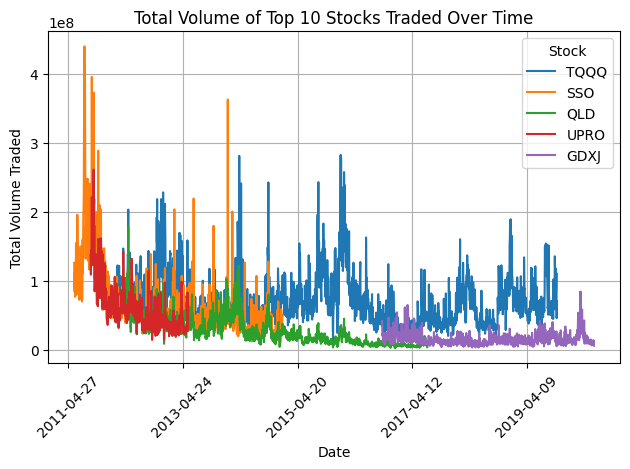

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'Date' and 'stock' columns and calculate the total volume traded for each combination
stock_daily_volume = stock.groupby(['Date', 'stock'])['Volume'].sum()

# Unstack the DataFrame to have 'Date' as the index and 'stock' as columns
stock_daily_volume_unstacked = stock_daily_volume.unstack()

# Select the top 10 stocks with the highest total volume traded
top_stocks = stock_daily_volume_unstacked.sum().nlargest(5).index

# Plot the data for the top 10 stocks
stock_daily_volume_unstacked[top_stocks].plot()

# Set the title and labels
plt.title('Total Volume of Top 5 Stocks Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Total Volume Traded')
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Stock')
plt.grid(True)
plt.tight_layout()
plt.show()
